##Part-1: Data Preparation

### Importing required modules for Sentiment Analysis

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

###Importing required modules for Deep Learning Models

In [ ]:
# import modules
import keras
keras.__version__
from numpy import array
from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding, SimpleRNN
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
# from keras.layers.merge import Concatenate
from keras.layers import Bidirectional


### **Few lines about the people and reasons for the interest**

1. Joe biden has about 7.5K tweets. An analysis has showed that Biden has 2874090 retweets in total and 57481 retweets per tweet. We can see the word cloud of the Biden's tweets from first, most of them are positive words.Biden cares more about the country by frequently mentioning “nation”, “us” and “America”.
2. Elon Musk has about 21k tweets till date. As per the analysis, Musk's tweets are related to each stock for four relevant stocks like Bitcoin, Dogecoin, Tesla, and Twitter. He is certainly unique. His tweets are mostly controversial and mix of all the sentiments.
Not to mention ,about his recent issue with twitter:(
3. Joe Biden and Elon Musk are both powerful people with millions of followers spread across demographics. Their statements and opinions matter to their followers as they value them and take it as advice to better themselves.
4. In this context, the social media content they generate reaches millions not only in US but people around the globe.
5. This is particularly interesting for us as people are influenced by the opinions of these two while taking financial decisions.
6. In our project, we set out to explore the influence these two people have on economy, in particularly on stock market
7. We set to analyse the tweets these two published over the time and calculate the crowd sentiment for the same
So, We thought a combination of an account dominated by positive tweets and all mix tweets' account would give us a variety of tweets with all the sentiments. So, we have chosen Elon Musk and Joe Biden for our analysis.




###Downloading the tweet scraping package

In [ ]:
! pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 1.5 MB/s 


###Scraping Joe Biden's recent 2000 tweets

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:joebiden').get_items()):
    if i>2000:
        break
    attributes_container.append([tweet.id,tweet.date, tweet.content])
    
# Creating a dataframe from the tweets listed above 
tweets_1 = pd.DataFrame(attributes_container, columns=["ID","Date Created", "Tweets"])

In [ ]:
tweets_1.head() # displaying top 5 tweets

,ID,Date Created,Tweets
0,1598758905663848461,2022-12-02 19:20:01+00:00,"Today, we learned that the economy added 263,0..."
1,1598692717118328833,2022-12-02 14:57:00+00:00,Today is the last day to vote early ahead of n...
2,1598501975544549376,2022-12-02 02:19:04+00:00,Link to my full letter to @TheDemocrats Rules ...
3,1598501973124419584,2022-12-02 02:19:03+00:00,The Democratic Party has worked hard to reflec...
4,1598457919942557696,2022-12-01 23:24:00+00:00,There is further evidence that my economic pla...


In [ ]:
tweets_1.shape  # We scraped 2001 tweets and there are 3 columns in this data frame

(2001, 3)

###Scraping Elon Musk's recent 2000 tweets

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>2000:
        break
    attributes_container.append([tweet.id,tweet.date, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_2 = pd.DataFrame(attributes_container, columns=["ID","Date Created", "Tweets"])

In [ ]:
tweets_2.head() # displaying the top 5 tweets

,ID,Date Created,Tweets
0,1599228566859706368,2022-12-04 02:26:17+00:00,"@wintonARK Wow. Meanwhile, on Twitter …"
1,1599228101547868160,2022-12-04 02:24:26+00:00,Pretty wild that you can engage in back-and-fo...
2,1599226772574203904,2022-12-04 02:19:09+00:00,"@thevivafrei And, in doing so, destroy their c..."
3,1599224347121500160,2022-12-04 02:09:31+00:00,"I am not expressing an opinion, but did promis..."
4,1599205091294052352,2022-12-04 00:53:00+00:00,Just a note to thank advertisers for returning...


In [ ]:
tweets_2.shape # we scaraped 2001 tweets and there are 3 columns in this dataframe

(2001, 3)

### Concatenating both individuals tweets into a single dataframe

In [ ]:
tweets_final=pd.concat([tweets_1,tweets_2],axis=0) # concat is used to combine multiple data frames

In [ ]:
tweets_final.shape # Checking if concatinating was successful

(4002, 3)

In [ ]:
tweets_final.tail() #Checking indexes

,ID,Date Created,Tweets
1996,1555253283203194881,2022-08-04 18:04:12+00:00,@garyblack00 I had more kids in Q2 than they m...
1997,1555228099981316097,2022-08-04 16:24:08+00:00,@dogeofficialceo @chicago_glenn @mySA @happyda...
1998,1555227814747672578,2022-08-04 16:23:00+00:00,@john @fullsendpodcast Was a fun hang
1999,1555227323909263360,2022-08-04 16:21:03+00:00,@dogeofficialceo @chicago_glenn @mySA @happyda...
2000,1555227202739920896,2022-08-04 16:20:34+00:00,@RehydratedTater 🤣


In [ ]:
tweets_final=tweets_final.reset_index() # Resetting indexes
tweets_final # Checking if indexes were reset

,index,ID,Date Created,Tweets
0,0,1598758905663848461,2022-12-02 19:20:01+00:00,"Today, we learned that the economy added 263,0..."
1,1,1598692717118328833,2022-12-02 14:57:00+00:00,Today is the last day to vote early ahead of n...
2,2,1598501975544549376,2022-12-02 02:19:04+00:00,Link to my full letter to @TheDemocrats Rules ...
3,3,1598501973124419584,2022-12-02 02:19:03+00:00,The Democratic Party has worked hard to reflec...
4,4,1598457919942557696,2022-12-01 23:24:00+00:00,There is further evidence that my economic pla...
...,...,...,...,...
3997,1996,1555253283203194881,2022-08-04 18:04:12+00:00,@garyblack00 I had more kids in Q2 than they m...
3998,1997,1555228099981316097,2022-08-04 16:24:08+00:00,@dogeofficialceo @chicago_glenn @mySA @happyda...
3999,1998,1555227814747672578,2022-08-04 16:23:00+00:00,@john @fullsendpodcast Was a fun hang
4000,1999,1555227323909263360,2022-08-04 16:21:03+00:00,@dogeofficialceo @chicago_glenn @mySA @happyda...


In [ ]:
tweets_final.drop(['index'],axis=1,inplace=True) # Droping the index column

In [ ]:
tweets_final.head() # Checking if the index column in dropped

,ID,Date Created,Tweets
0,1598758905663848461,2022-12-02 19:20:01+00:00,"Today, we learned that the economy added 263,0..."
1,1598692717118328833,2022-12-02 14:57:00+00:00,Today is the last day to vote early ahead of n...
2,1598501975544549376,2022-12-02 02:19:04+00:00,Link to my full letter to @TheDemocrats Rules ...
3,1598501973124419584,2022-12-02 02:19:03+00:00,The Democratic Party has worked hard to reflec...
4,1598457919942557696,2022-12-01 23:24:00+00:00,There is further evidence that my economic pla...


###Converting the concatinated dataframe into a .CSV file

In [ ]:
tweets_final.to_csv('tweets_final', index=False)  # to_csv is used to convert dataframe to csv file

###Preprocessing the tweets 

In [ ]:
import string
tweet_list=tweets_final['Tweets']
tweet_list 

0       Today, we learned that the economy added 263,0...
1       Today is the last day to vote early ahead of n...
2       Link to my full letter to @TheDemocrats Rules ...
3       The Democratic Party has worked hard to reflec...
4       There is further evidence that my economic pla...
                              ...                        
3997    @garyblack00 I had more kids in Q2 than they m...
3998    @dogeofficialceo @chicago_glenn @mySA @happyda...
3999                @john @fullsendpodcast Was a fun hang
4000    @dogeofficialceo @chicago_glenn @mySA @happyda...
4001                                   @RehydratedTater 🤣
Name: Tweets, Length: 4002, dtype: object

#### Lowercasing all letters

In [ ]:
for i in range(tweets_final.shape[0]):
  tweet_list[i]=tweet_list[i].lower()  # lower() is used to convert all characters to lower case.

<ipython-input-18-ab64c05948f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=tweet_list[i].lower()  # lower() is used to convert all characters to lower case.


In [ ]:
tweet_list

0       today, we learned that the economy added 263,0...
1       today is the last day to vote early ahead of n...
2       link to my full letter to @thedemocrats rules ...
3       the democratic party has worked hard to reflec...
4       there is further evidence that my economic pla...
                              ...                        
3997    @garyblack00 i had more kids in q2 than they m...
3998    @dogeofficialceo @chicago_glenn @mysa @happyda...
3999                @john @fullsendpodcast was a fun hang
4000    @dogeofficialceo @chicago_glenn @mysa @happyda...
4001                                   @rehydratedtater 🤣
Name: Tweets, Length: 4002, dtype: object

####Removing hashtags and mentions

In [ ]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub("@[A-Za-z0-9_]+","", tweet_list[i]) # removes all the mentions
  tweet_list[i]=re.sub("#[A-Za-z0-9_]+","", tweet_list[i]) # removes all the hashtags

<ipython-input-20-22fa0cdb9242>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("@[A-Za-z0-9_]+","", tweet_list[i]) # removes all the mentions
<ipython-input-20-22fa0cdb9242>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("#[A-Za-z0-9_]+","", tweet_list[i]) # removes all the hashtags


In [ ]:
tweet_list

0       today, we learned that the economy added 263,0...
1       today is the last day to vote early ahead of n...
2       link to my full letter to  rules and bylaws co...
3       the democratic party has worked hard to reflec...
4       there is further evidence that my economic pla...
                              ...                        
3997           i had more kids in q2 than they made cars!
3998                                     stone of destiny
3999                                       was a fun hang
4000                                              whiskey
4001                                                    🤣
Name: Tweets, Length: 4002, dtype: object

####Removing Links

In [ ]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub(r"http\S+", "", tweet_list[i]) # Removes all the http links
  tweet_list[i]=re.sub(r"www.\S+", "", tweet_list[i]) # removes all the WWW. links

<ipython-input-22-ef0afc76ea17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub(r"http\S+", "", tweet_list[i]) # Removes all the http links
<ipython-input-22-ef0afc76ea17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub(r"www.\S+", "", tweet_list[i]) # removes all the WWW. links


In [ ]:
tweet_list

0       today, we learned that the economy added 263,0...
1       today is the last day to vote early ahead of n...
2       link to my full letter to  rules and bylaws co...
3       the democratic party has worked hard to reflec...
4       there is further evidence that my economic pla...
                              ...                        
3997           i had more kids in q2 than they made cars!
3998                                     stone of destiny
3999                                       was a fun hang
4000                                              whiskey
4001                                                    🤣
Name: Tweets, Length: 4002, dtype: object

####Removing punctuations

In [ ]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub('[()!?]', ' ', tweet_list[i])   # Removes Punctuations
  tweet_list[i]=re.sub('\[.*?\]',' ', tweet_list[i])   # Removes Punctuations

<ipython-input-24-df58c108aa94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub('[()!?]', ' ', tweet_list[i])   # Removes Punctuations
<ipython-input-24-df58c108aa94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub('\[.*?\]',' ', tweet_list[i])   # Removes Punctuations


In [ ]:
tweet_list

0       today, we learned that the economy added 263,0...
1       today is the last day to vote early ahead of n...
2       link to my full letter to  rules and bylaws co...
3       the democratic party has worked hard to reflec...
4       there is further evidence that my economic pla...
                              ...                        
3997           i had more kids in q2 than they made cars 
3998                                     stone of destiny
3999                                       was a fun hang
4000                                              whiskey
4001                                                    🤣
Name: Tweets, Length: 4002, dtype: object

#### Filtering all non-alphanumeric characters

In [ ]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub("[^a-z0-9]"," ", tweet_list[i])  # Removes all non-alphanumeric characters

<ipython-input-26-d5a08720bd43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("[^a-z0-9]"," ", tweet_list[i])  # Removes all non-alphanumeric characters


In [ ]:
tweet_list

0       today  we learned that the economy added 263 0...
1       today is the last day to vote early ahead of n...
2       link to my full letter to  rules and bylaws co...
3       the democratic party has worked hard to reflec...
4       there is further evidence that my economic pla...
                              ...                        
3997           i had more kids in q2 than they made cars 
3998                                     stone of destiny
3999                                       was a fun hang
4000                                              whiskey
4001                                                     
Name: Tweets, Length: 4002, dtype: object

In [ ]:
for i in range(tweets_final.shape[0]):
  tweets_final.iloc[i,1]=tweet_list[i]

In [ ]:
tweets_final.head()

,ID,Date Created,Tweets
0,1598758905663848461,today we learned that the economy added 263 0...,today we learned that the economy added 263 0...
1,1598692717118328833,today is the last day to vote early ahead of n...,today is the last day to vote early ahead of n...
2,1598501975544549376,link to my full letter to rules and bylaws co...,link to my full letter to rules and bylaws co...
3,1598501973124419584,the democratic party has worked hard to reflec...,the democratic party has worked hard to reflec...
4,1598457919942557696,there is further evidence that my economic pla...,there is further evidence that my economic pla...


###Word Cloud

####Preparing data for wordcloud  

In [ ]:
# Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
# Gather all the text
txt = ' '.join(tweet_list)
# Tokenize abstracts
tokens = word_tokenize(txt)
# Removing stopwords
text_clean = [word for word in tokens if word not in stopwords]

####Generating the word cloud

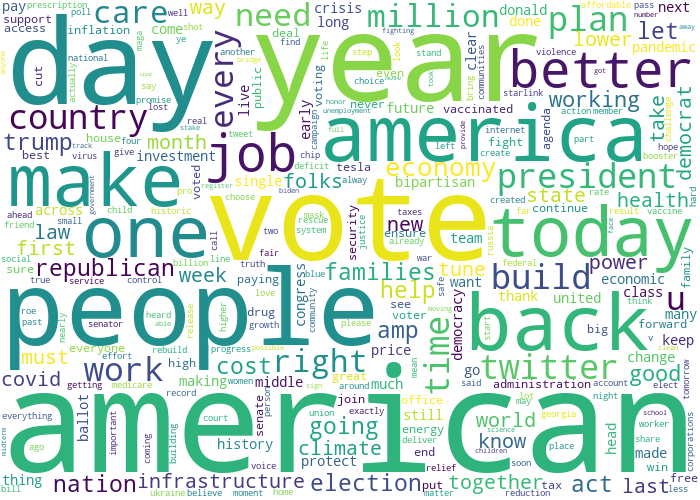

In [ ]:
# Generate the text
text = ' '.join(text_clean)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(text)
# Visualize the word cloud
wordcloud.to_image()

####Conclusion
American, America, People, day, vote, job, year, back, today are frequently used words in the tweets that we scraped.

###Sentiment Analysis

In [ ]:
for i in range(tweets_final.shape[0]):
  text=str(tweets_final['Tweets'][i])
  analysis = TextBlob(text)  # Preprocess the data for Sentiment Analysis.
  score= SentimentIntensityAnalyzer().polarity_scores(text)  # Polarity_scores generates all the 4 scores
  tweets_final.loc[i,'neg'] = score['neg']  # assigning the negative score to respective cell of the neg column.
  tweets_final.loc[i,'neu'] = score['neu']  # assigning the neutral score to respective cell of the neu column.
  tweets_final.loc[i,'pos'] = score['pos']  # assigning the positive score to respective cell of the pos column.
  tweets_final.loc[i,'comp'] = score['compound']  # assigning the compound score to respective cell of the comp column.

In [ ]:
tweets_final.head() # Checking if the values are assigned properly

,ID,Date Created,Tweets,neg,neu,pos,comp
0,1598758905663848461,today we learned that the economy added 263 0...,today we learned that the economy added 263 0...,0.119,0.833,0.048,-0.4588
1,1598692717118328833,today is the last day to vote early ahead of n...,today is the last day to vote early ahead of n...,0.094,0.906,0.000,-0.3612
2,1598501975544549376,link to my full letter to rules and bylaws co...,link to my full letter to rules and bylaws co...,0.000,1.000,0.000,0.0000
3,1598501973124419584,the democratic party has worked hard to reflec...,the democratic party has worked hard to reflec...,0.026,0.809,0.165,0.7615
4,1598457919942557696,there is further evidence that my economic pla...,there is further evidence that my economic pla...,0.000,0.874,0.126,0.6705


####Converting the dataframe to a CSV file

In [ ]:
tweets_final.to_csv("final.csv")  # Converting the final dataframe with the sentiment scores to a .csv file

#### Distribution of the Scores

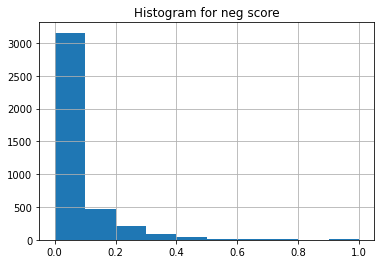

In [ ]:
import matplotlib.pyplot as plt

plt.title("Histogram for neg score")
tweets_final['neg'].hist()
plt.show()
# We can observe that the histogram is right skewed

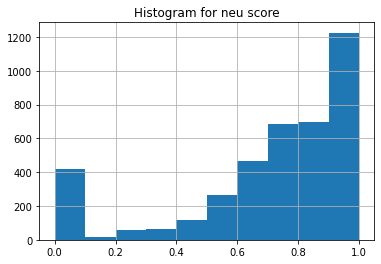

In [ ]:
plt.title("Histogram for neu score")
tweets_final['neu'].hist()
plt.show()
#We can observe that the histogram is left skewed.

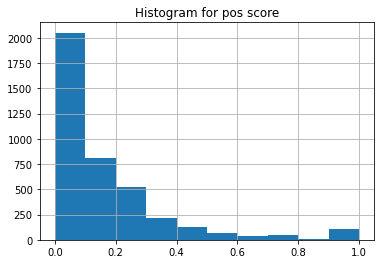

In [ ]:
plt.title("Histogram for pos score")
tweets_final['pos'].hist()
plt.show()
# We can observe that the histogram is right skewed

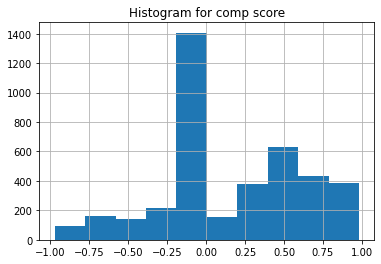

In [ ]:
plt.title("Histogram for comp score")
tweets_final['comp'].hist()
plt.show()
# We can observe that the histogram is skewed.

In [ ]:
tweets_final[['neg','neu','pos','comp']].describe()

,neg,neu,pos,comp
count,4002.00000,4002.000000,4002.000000,4002.00000
mean,0.05718,0.712840,0.155765,0.18219
std,0.11345,0.299737,0.215416,0.43117
min,0.00000,0.000000,0.000000,-0.97290
25%,0.00000,0.621000,0.000000,0.00000
50%,0.00000,0.789000,0.093000,0.00000
75%,0.08100,0.943000,0.220000,0.51060
max,1.00000,1.000000,1.000000,0.98220


####Conclusion:
* For Negative score, 50% of the data have 0 score.
* Positive, Negative and Neutral have score ranging from 0 to 1 whereas Compound Score is ranging from -0.97 to 0.98.
* We can observe that the Negative score histogram is right skewed
* We can observe that the Neutral score histogram is left skewed
* We can observe that the Positive score histogram is right skewed
* We can observe that the Compound score histogram is bimodal


###Preprocessing for Lemmatization

####Removing STOP words

In [ ]:
# Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english')) # assigning all the english stop words to the variable stopwords

In [ ]:
tweets_final.head()

,ID,Date Created,Tweets,neg,neu,pos,comp
0,1598758905663848461,today we learned that the economy added 263 0...,today we learned that the economy added 263 0...,0.119,0.833,0.048,-0.4588
1,1598692717118328833,today is the last day to vote early ahead of n...,today is the last day to vote early ahead of n...,0.094,0.906,0.000,-0.3612
2,1598501975544549376,link to my full letter to rules and bylaws co...,link to my full letter to rules and bylaws co...,0.000,1.000,0.000,0.0000
3,1598501973124419584,the democratic party has worked hard to reflec...,the democratic party has worked hard to reflec...,0.026,0.809,0.165,0.7615
4,1598457919942557696,there is further evidence that my economic pla...,there is further evidence that my economic pla...,0.000,0.874,0.126,0.6705


In [ ]:
# Removing all the stopwords from all the tweets.
tweets_final["Tweets"] = tweets_final['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])) 
tweets_final.head()

,ID,Date Created,Tweets,neg,neu,pos,comp
0,1598758905663848461,today we learned that the economy added 263 0...,today learned economy added 263 000 jobs novem...,0.119,0.833,0.048,-0.4588
1,1598692717118328833,today is the last day to vote early ahead of n...,today last day vote early ahead next tuesday g...,0.094,0.906,0.000,-0.3612
2,1598501975544549376,link to my full letter to rules and bylaws co...,link full letter rules bylaws committee,0.000,1.000,0.000,0.0000
3,1598501973124419584,the democratic party has worked hard to reflec...,democratic party worked hard reflect diversity...,0.026,0.809,0.165,0.7615
4,1598457919942557696,there is further evidence that my economic pla...,evidence economic plan working learned inflati...,0.000,0.874,0.126,0.6705


####Tokenizing the tweets

In [ ]:
# Tokenizing all the tweets individually
tweets_final['Tweets'] = tweets_final.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
tweets_final.head()

,ID,Date Created,Tweets,neg,neu,pos,comp
0,1598758905663848461,today we learned that the economy added 263 0...,"[today, learned, economy, added, 263, 000, job...",0.119,0.833,0.048,-0.4588
1,1598692717118328833,today is the last day to vote early ahead of n...,"[today, last, day, vote, early, ahead, next, t...",0.094,0.906,0.000,-0.3612
2,1598501975544549376,link to my full letter to rules and bylaws co...,"[link, full, letter, rules, bylaws, committee]",0.000,1.000,0.000,0.0000
3,1598501973124419584,the democratic party has worked hard to reflec...,"[democratic, party, worked, hard, reflect, div...",0.026,0.809,0.165,0.7615
4,1598457919942557696,there is further evidence that my economic pla...,"[evidence, economic, plan, working, learned, i...",0.000,0.874,0.126,0.6705


####Lemmatizing the Tweets

In [ ]:
nltk.download('omw-1.4')

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer() # creating an object for WordNetLemmatizer

# using the above object to lemmatize all the tweets 
tweets_final['lemmatized'] = tweets_final['Tweets'].apply(lambda x: [lm.lemmatize(y) for y in x])
tweets_final.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,ID,Date Created,Tweets,neg,neu,pos,comp,lemmatized
0,1598758905663848461,today we learned that the economy added 263 0...,"[today, learned, economy, added, 263, 000, job...",0.119,0.833,0.048,-0.4588,"[today, learned, economy, added, 263, 000, job..."
1,1598692717118328833,today is the last day to vote early ahead of n...,"[today, last, day, vote, early, ahead, next, t...",0.094,0.906,0.000,-0.3612,"[today, last, day, vote, early, ahead, next, t..."
2,1598501975544549376,link to my full letter to rules and bylaws co...,"[link, full, letter, rules, bylaws, committee]",0.000,1.000,0.000,0.0000,"[link, full, letter, rule, bylaw, committee]"
3,1598501973124419584,the democratic party has worked hard to reflec...,"[democratic, party, worked, hard, reflect, div...",0.026,0.809,0.165,0.7615,"[democratic, party, worked, hard, reflect, div..."
4,1598457919942557696,there is further evidence that my economic pla...,"[evidence, economic, plan, working, learned, i...",0.000,0.874,0.126,0.6705,"[evidence, economic, plan, working, learned, i..."


In [ ]:
# here's what it looked like before
tweets_final['lemmatized'].head()

0    [today, learned, economy, added, 263, 000, job...
1    [today, last, day, vote, early, ahead, next, t...
2         [link, full, letter, rule, bylaw, committee]
3    [democratic, party, worked, hard, reflect, div...
4    [evidence, economic, plan, working, learned, i...
Name: lemmatized, dtype: object

In [ ]:
def rejoin_words(row):
    my_list = row['lemmatized']
    joined_words = ( " ".join(my_list))
    return joined_words

tweets_final['lemmatized'] = tweets_final.apply(rejoin_words, axis=1)
# here it is after - no square brackets and commas!
tweets_final['lemmatized'].head()

0    today learned economy added 263 000 job novemb...
1    today last day vote early ahead next tuesday g...
2                link full letter rule bylaw committee
3    democratic party worked hard reflect diversity...
4    evidence economic plan working learned inflati...
Name: lemmatized, dtype: object

##Part-2: Modeling

###Model-1.A : CountVectorizer with Dense Neural Networks

###Splitting the data

In [ ]:
# split into X and Y
X=pd.DataFrame(tweets_final['lemmatized'])  # tweets
y=tweets_final[['neg','neu','pos','comp']]  # All the 4 scores
print(X.shape,y.shape)

(4002, 1) (4002, 4)


####Train-test split: Train 80% and Test 20%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3201, 1) (3201, 4)
(801, 1) (801, 4)


####Transforming X_train and X_test using CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# get rid of garbage text
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#creating an object for CountVectorizer
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1), # (1,1) is unigram, (1,2) is uni and bigram, (2,2) is just bigram
                     tokenizer = token.tokenize)
# Transforming X_train and X_test using the CountVectorizer() object
X_train = cv.fit_transform(X_train['lemmatized'])
X_test = cv.transform(X_test['lemmatized'])
# Printing the shape of X_train and X_test after transformation
print(X_train.shape)
print(X_test.shape)

(3201, 5230)
(801, 5230)


####Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.05))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(4, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               523100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 204       
                                                                 
Total params: 528,354
Trainable params: 528,354
Non-trainable params: 0
_________________________________________________________________


####Early Stopping:

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20,
                   restore_best_weights = True)

####Compiling:

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [ ]:
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
X_test=pd.DataFrame.sparse.from_spmatrix(X_test)

####Model Fitting

In [ ]:
history1 = model.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=20,
                    callbacks=[es],
                    validation_split=0.2)

Epoch 1/40
128/128 [==============================] - 2s 10ms/step - loss: 0.0859 - mse: 0.0859 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 2/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 3/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 4/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 5/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 6/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 7/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 8/40
128/128 [==============================] - 1s 8ms/step - loss: 0

####Learning and Loss curves

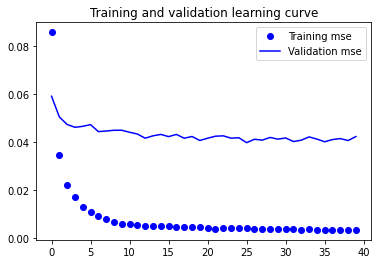

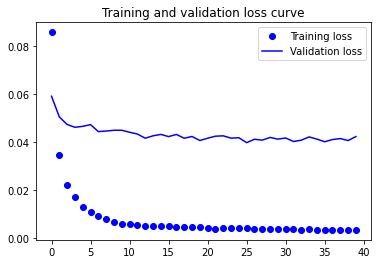

In [ ]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

####Prediction

In [ ]:
# Predicting the scores for X_train
pred_train=model.predict(X_train)
pred_train

101/101 [==============================] - 0s 4ms/step


array([[ 1.1556864e-02,  6.4935243e-01,  3.4097964e-01,  4.6237841e-01],
       [ 1.5402928e-02,  9.8671329e-01,  7.6526895e-02,  3.3783069e-01],
       [ 2.0580664e-02,  8.6975157e-01,  1.7862779e-01,  7.9599082e-01],
       ...,
       [ 6.5868668e-02,  5.8059835e-01,  2.2622797e-01,  1.8269998e-01],
       [ 2.8362393e-01,  6.3270646e-01,  1.1451493e-01, -5.0797069e-01],
       [ 8.0489740e-03,  9.0330839e-04,  1.7307624e-02,  1.1094511e-03]],
      dtype=float32)

In [ ]:
# Predicting the scores for X_test
pred_test=model.predict(X_test)
pred_test

26/26 [==============================] - 0s 4ms/step


array([[-0.00493471,  0.8718884 ,  0.10754984,  0.34232768],
       [ 0.07110867,  0.68343115,  0.3147018 ,  1.0060229 ],
       [ 0.04857966,  0.8227507 ,  0.12356957,  0.3115294 ],
       ...,
       [ 0.05844257,  0.93880284, -0.00875191, -0.13597931],
       [ 0.01967438,  0.70589733,  0.22594377,  0.44753134],
       [-0.00218063,  1.0208634 , -0.0090928 , -0.01489474]],
      dtype=float32)

####Evaluation Metrics

#####Target 1: Neg score

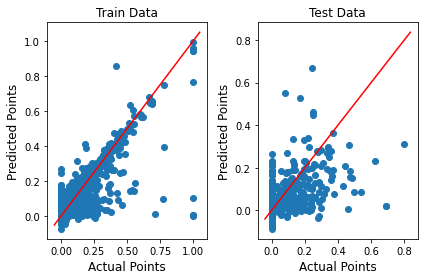

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.7611641790582451
RMSE for negative sentiment: 0.05641755875062311
MAE for negative sentiment: 0.021890217942926747


For Test data:
R Squared for negative sentiment: 0.24157282313763906
rmse for negative sentiment: 0.09147050607923546
MAE for negative sentiment: 0.05184466771050338


#####Target 2: neutral score

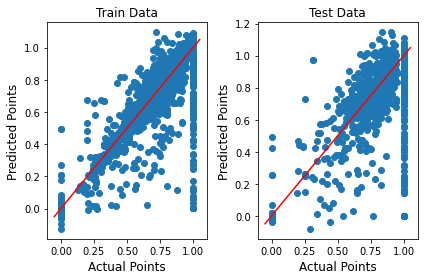

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.8251910859778163
RMSE for neutral sentiment: 0.12665483270995698
MAE for neutral sentiment: 0.05165928526913066


For Test data:
R Squared for neutral sentiment: 0.3434707011020769
RMSE for neutral sentiment: 0.23172055385371948
MAE for neutral sentiment: 0.13565799689114316


#####Target 3: positive score

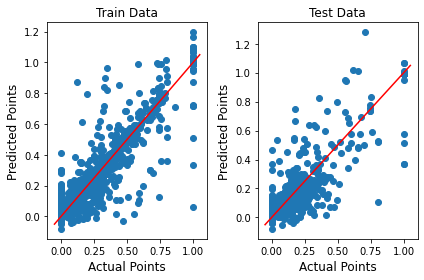

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.9026018238785297
RMSE for positive sentiment: 0.06798152643040108
MAE for positive sentiment: 0.03001973803490819


For Test data:
R Squared for positive sentiment: 0.6821490083646935
RMSE for positive sentiment: 0.11573695551355906
MAE for positive sentiment: 0.06950557806492595


#####Target 4: compound score

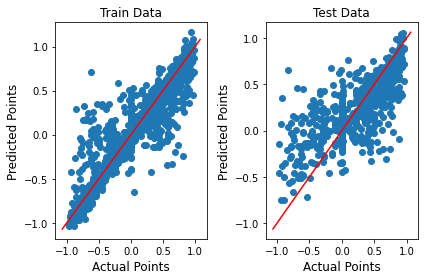

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.9018964402935751
RMSE for comp sentiment: 0.13524077461395229
MAE for comp sentiment: 0.060940101725902085


For Test data:
R Squared for comp sentiment: 0.562903904028775
RMSE for comp sentiment: 0.28321709742873225
MAE for comp sentiment: 0.18755326988924012


###Model-1.B TfidfVectorizer() with Dense layers

####Splitting the data

In [ ]:
# split into X and Y
X=pd.DataFrame(tweets_final['lemmatized']) # tweets 
y=tweets_final[['neg','neu','pos','comp']] # All the 4 scores 
print(X.shape,y.shape)

(4002, 1) (4002, 4)


####Train-test split: Train 80%, Test 20%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)
print(X_train.shape, y_train.shape)

(3201, 1) (3201, 4)


####Transforming X_train and X_test using TfidfVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer() # creating an object for the TfidfVectorizer()
# Transforming X_train and X_test using the above object
X_train = tf.fit_transform(X_train['lemmatized'])
X_test = tf.transform(X_test['lemmatized'])
# Checking the shape of X_train and X_test after transformation
print(X_train.shape)
print(X_test.shape)

(3201, 5359)
(801, 5359)


####Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               536000    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 404       
                                                                 
Total params: 546,504
Trainable params: 546,504
Non-trainable params: 0
_________________________________________________________________


####Early stopping

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

####Compiling

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [ ]:
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
X_test=pd.DataFrame.sparse.from_spmatrix(X_test)

####Fitting model

In [ ]:
history2 = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=100,
                     callbacks=[es],
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 1s 28ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.0821 - val_mse: 0.0821
Epoch 2/10
26/26 [==============================] - 0s 18ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 3/10
26/26 [==============================] - 0s 16ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 4/10
26/26 [==============================] - 0s 16ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 5/10
26/26 [==============================] - 0s 16ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 6/10
26/26 [==============================] - 0s 17ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 7/10
26/26 [==============================] - 0s 17ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 8/10
26/26 [==============================] - 0s 16ms/step - loss: 0.0091 - m

####Learning and Loss Curve

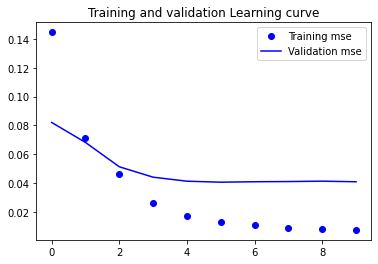

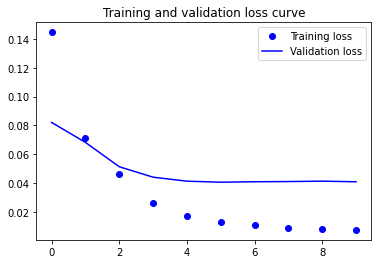

In [ ]:
import matplotlib.pyplot as plt

mse = history2.history['mse']
val_mse = history2.history['val_mse']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

####Prediction

In [ ]:
# Predicting the scores for the X_train
pred_train=model.predict(X_train)
pred_train

101/101 [==============================] - 0s 4ms/step


array([[ 0.01166995,  0.7061574 ,  0.2224639 ,  0.36179605],
       [-0.00763475,  0.80426115,  0.09177824,  0.39596143],
       [ 0.00364378,  0.8091809 ,  0.19414943,  0.8018391 ],
       ...,
       [ 0.09001843,  0.41719553,  0.19864666,  0.20878407],
       [ 0.21145672,  0.49897015,  0.13666788, -0.31901526],
       [ 0.06430297,  0.14280343,  0.08062538, -0.00893559]],
      dtype=float32)

In [ ]:
# Predicting the scores for the X_test
pred_test=model.predict(X_test)
pred_test

26/26 [==============================] - 0s 4ms/step


array([[ 0.0166306 ,  0.7655464 ,  0.0330601 ,  0.05547533],
       [ 0.07038435,  0.70242935,  0.33744714,  0.9047488 ],
       [ 0.0035437 ,  0.7311029 ,  0.13817641,  0.4520686 ],
       ...,
       [ 0.03441034,  0.8677859 , -0.01660485, -0.04877647],
       [-0.00226   ,  0.5182889 ,  0.32001474,  0.526487  ],
       [ 0.02784423,  1.0333396 ,  0.05205895, -0.0699501 ]],
      dtype=float32)

####Evaluation metrics

#####Target 1: neg score

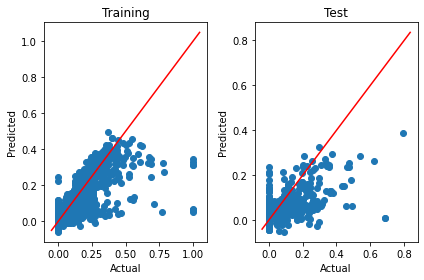

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 0
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neg'], y=pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
print("For Train data:")
print('R2 for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R2 for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R2 for negative sentiment: 0.6109265274304597
rmse for negative sentiment: 0.07200793699293911
MAE for negative sentiment: 0.03531444998478395


For Test data:
R2 for negative sentiment: 0.3508148369714097
rmse for negative sentiment: 0.08462689979681623
MAE for negative sentiment: 0.05249414230682207


#####Target 2: neu score

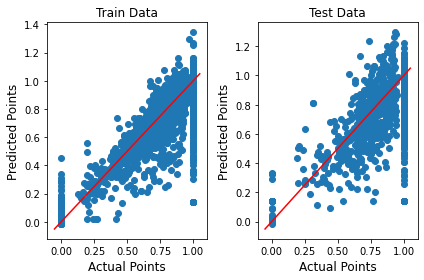

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.8300884803769425
RMSE for neutral sentiment: 0.12486806743029845
MAE for neutral sentiment: 0.07807384130277696


For Test data:
R Squared for neutral sentiment: 0.41423348482810085
RMSE for neutral sentiment: 0.21887682124790545
MAE for neutral sentiment: 0.15984841278755338


#####Target 3: Pos score

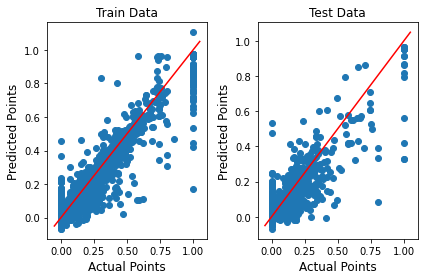

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.8924208535137648
RMSE for positive sentiment: 0.07144626775433198
MAE for positive sentiment: 0.04466014798677543


For Test data:
R Squared for positive sentiment: 0.707557668553249
RMSE for positive sentiment: 0.11101467386558582
MAE for positive sentiment: 0.07535680762334225


#####Target 4: Comp score

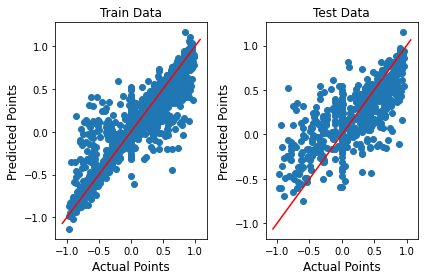

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.8933323702569911
RMSE for comp sentiment: 0.14102028528139451
MAE for comp sentiment: 0.07447976915548737


For Test data:
R Squared for comp sentiment: 0.567596300740382
RMSE for comp sentiment: 0.2816927724484962
MAE for comp sentiment: 0.1968854444217295


###Model 2: Flattened word embeddings into a Dense Neural Network (pre-trained)

####Splitting the data

In [ ]:
# split into X and Y
X=pd.DataFrame(tweets_final['lemmatized']) # tweets
y=tweets_final[['neg','neu','pos','comp']] # All the 4 scores
print(X.shape,y.shape)

(4002, 1) (4002, 4)


####Train-test split: Train 80% and Test 20%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [ ]:
print(X.shape) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4002, 1)
(3201, 1) (3201, 4)
(801, 1) (801, 4)


####Pre-processing the data 

In [ ]:
token = Tokenizer() # creating an object for Tokenizer()
token.fit_on_texts(X_train['lemmatized'])
seq = token.texts_to_sequences(X_train['lemmatized']) # Converting texts to sequences

In [ ]:
from keras_preprocessing.sequence import pad_sequences
pad_seq_train = pad_sequences(seq,maxlen=300) # Padding the sequences

In [ ]:
pad_seq_train.shape # checking if the sequences are padded properly

(3201, 300)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size

5382

####Downloading the Glove word embedding

In [ ]:
import os # Download and unzip glove word embeddings from opensource
!pip install wget
import wget # Using wget library to download 
wget.download('https://nlp.stanford.edu/data/glove.6B.zip') # Download the zip file
# os.mkdir('/content/glove_unzip')
from zipfile import ZipFile
ZipFile("/content/glove.6B.zip").extractall("/content/glove_unzip") # Ectract files
embeddings_index = {}
f = open('/content/glove_unzip/glove.6B.300d.txt') # File path 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs # Add coefficients to the dictionary as word index pair
f.close()

print(f'Found {len(embeddings_index)} word vectors.')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a27bb6bc0e15b339267bcfa9447f9d7699a6614640fd1a2b0adacd9df3ae3716
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Found 400000 word vectors.


####Creating Embedding matrix

In [ ]:
embedding_dim = 300 # this is the dimension of the file we imported
max_words=10000
maxlen=300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

####Model Architecture

In [ ]:
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                2880032   
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                660       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

####Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

####Compiling

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

####Model Fitting

In [ ]:
history3 = model.fit(pad_seq_train, y_train, 
                    epochs=30, 
                    batch_size=100,
                    callbacks=[es],
                    validation_split=0.2)

Epoch 1/30
26/26 [==============================] - 5s 185ms/step - loss: 0.1291 - mse: 0.1291 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 2/30
26/26 [==============================] - 3s 124ms/step - loss: 0.1391 - mse: 0.1391 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 3/30
26/26 [==============================] - 3s 123ms/step - loss: 0.1524 - mse: 0.1524 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 4/30
26/26 [==============================] - 3s 117ms/step - loss: 0.2147 - mse: 0.2147 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 5/30
26/26 [==============================] - 3s 117ms/step - loss: 0.0797 - mse: 0.0797 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 6/30
26/26 [==============================] - 3s 115ms/step - loss: 0.0757 - mse: 0.0757 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 7/30
26/26 [==============================] - 3s 119ms/step - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 8/30
26/26 [==============================] - 3s 118ms/step - loss: 0.

####Learning ang loss curves

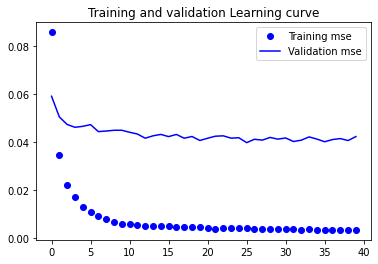

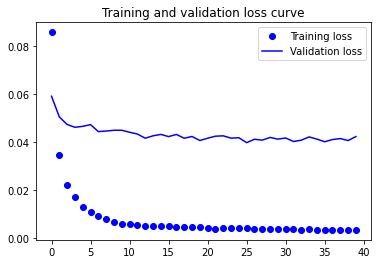

In [ ]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

####Prediction

In [ ]:
# Predicting the scores for padded sequences of X_train
pred_train=model.predict(pad_seq_train)
pred_train

101/101 [==============================] - 2s 16ms/step


array([[ 0.04289658,  0.5918572 ,  0.1630705 ,  0.3298794 ],
       [ 0.0148205 ,  0.79644024,  0.14053826,  0.368514  ],
       [ 0.05228776,  0.6333978 ,  0.18401653,  0.40018252],
       ...,
       [ 0.05302748,  0.53556156,  0.18634649,  0.2866848 ],
       [ 0.11421907,  0.7140852 ,  0.06435966, -0.14198062],
       [ 0.06653398,  0.56065667,  0.11137927,  0.07445063]],
      dtype=float32)

In [ ]:
token = Tokenizer()
token.fit_on_texts(X_test['lemmatized'])
seq = token.texts_to_sequences(X_test['lemmatized'])
from keras_preprocessing.sequence import pad_sequences
pad_seq_test = pad_sequences(seq,maxlen=300)

In [ ]:
# Predicting the scores for padded sequences of X_test
pred_test=model.predict(pad_seq_test)
pred_test

26/26 [==============================] - 0s 17ms/step


array([[0.05267776, 0.56100166, 0.13114424, 0.15242702],
       [0.05432178, 0.64894116, 0.09099005, 0.09504454],
       [0.02521299, 0.6458225 , 0.23934141, 0.49919164],
       ...,
       [0.06622696, 0.55372095, 0.11828708, 0.09654453],
       [0.05379101, 0.61174023, 0.14528145, 0.15998709],
       [0.02793977, 0.71229696, 0.0981012 , 0.19206315]], dtype=float32)

####Evalaution Metrics

#####Target 1: neg score

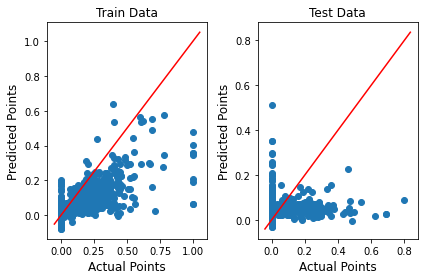

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.4242355680162734
RMSE for negative sentiment: 0.08759654449045978
MAE for negative sentiment: 0.05620428341838


For Test data:
R Squared for negative sentiment: -0.13508951051691054
rmse for negative sentiment: 0.11190234657139084
MAE for negative sentiment: 0.07374845712705425


#####Target 2: neu score

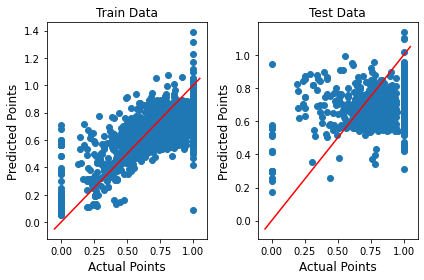

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.474865017729293
RMSE for neutral sentiment: 0.21952068704521654
MAE for neutral sentiment: 0.16610955764907703


For Test data:
R Squared for neutral sentiment: 0.0754928447972173
RMSE for neutral sentiment: 0.27497463876353634
MAE for neutral sentiment: 0.2237788621053267


#####Target 3: pos score

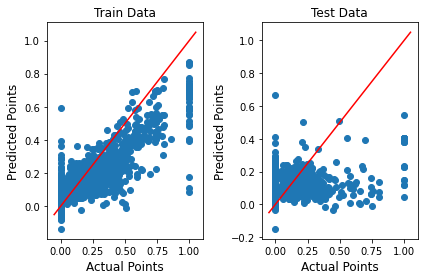

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.7248985953424874
RMSE for positive sentiment: 0.11425149815799593
MAE for positive sentiment: 0.07989467311942626


For Test data:
R Squared for positive sentiment: 0.03588318342882102
RMSE for positive sentiment: 0.20156962955723517
MAE for positive sentiment: 0.13776939890729947


#####Target 4: comp score

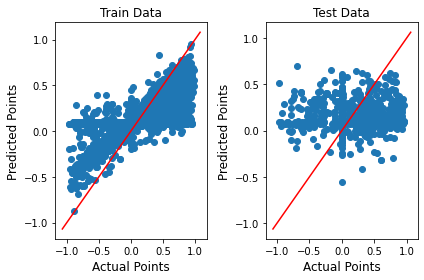

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.5807708168118947
RMSE for comp sentiment: 0.27957029196335187
MAE for comp sentiment: 0.19772067623396325


For Test data:
R Squared for comp sentiment: -0.09858249372923766
RMSE for comp sentiment: 0.4490010337345977
MAE for comp sentiment: 0.3523323699024882


###Model 3. Advanced Deep Learning Model

####Splitting the data

In [ ]:
# split into X and Y
X=pd.DataFrame(tweets_final['lemmatized']) # tweets
y=tweets_final[['neg','neu','pos','comp']] # All the 4 scores 
print(X.shape,y.shape)

(4002, 1) (4002, 4)


####Train-Test split: Train 80% teat 20%

In [ ]:
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [ ]:
print(X.shape) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4002, 1)
(3201, 1) (3201, 4)
(801, 1) (801, 4)


####Pre-processing the data

In [ ]:
token = Tokenizer() # creating an object for Tokenizer()
token.fit_on_texts(X_train['lemmatized'])
seq = token.texts_to_sequences(X_train['lemmatized']) #Converting text to sequences

In [ ]:
from keras_preprocessing.sequence import pad_sequences
pad_seq_train = pad_sequences(seq,maxlen=300) #padding the sequences

In [ ]:
pad_seq_train.shape # checking if the sequences are padded properly

(3201, 300)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size

5382

####Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(GRU(25, activation='linear',return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(20, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(15, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='linear'))
model.summary()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 64)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 149, 25)           6825      
                                                                 
 dropout_6 (Dropout)         (None, 149, 25)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 149, 20)           920       
                                                      

####Early stopping

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=4,
                   restore_best_weights = True)

####Compiling

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

####Model Fitting

In [ ]:
history3 = model.fit(pad_seq_train, y_train, 
                    epochs=12, 
                    batch_size=35,
                     callbacks=[es],
                    validation_split=0.2)

Epoch 1/12
74/74 [==============================] - 35s 391ms/step - loss: 0.2379 - mse: 0.2379 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 2/12
74/74 [==============================] - 15s 208ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 3/12
74/74 [==============================] - 15s 207ms/step - loss: 0.1025 - mse: 0.1025 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 4/12
74/74 [==============================] - 15s 209ms/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 5/12
74/74 [==============================] - 15s 209ms/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 6/12
74/74 [==============================] - 16s 211ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 7/12
74/74 [==============================] - 17s 236ms/step - loss: 0.0817 - mse: 0.0817 - val_loss: 0.0736 - val_mse: 0.0736
Epoch 8/12
74/74 [==============================] - 16s 210ms/step - 

####Learning and loss curves

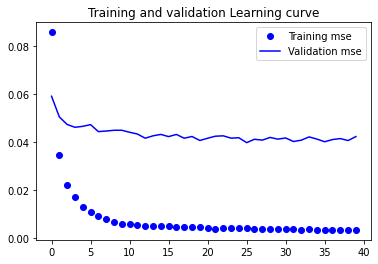

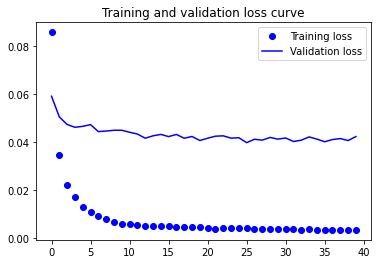

In [ ]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

####Prediction

In [ ]:
# Predicting the scores for padded sequences of X_train
pred_train=model.predict(pad_seq_train)
pred_train

101/101 [==============================] - 6s 55ms/step


array([[0.01984177, 0.6127553 , 0.22791235, 0.23318604],
       [0.02757756, 0.7284393 , 0.16389053, 0.5047974 ],
       [0.04995463, 0.8058816 , 0.21112818, 0.611658  ],
       ...,
       [0.01517612, 0.6567458 , 0.16553639, 0.23714846],
       [0.0471995 , 0.6243391 , 0.12090369, 0.09241002],
       [0.03003698, 0.44535026, 0.13849455, 0.0727053 ]], dtype=float32)

In [ ]:
token = Tokenizer()
token.fit_on_texts(X_test['lemmatized'])
seq = token.texts_to_sequences(X_test['lemmatized']) # Converting the texts to sequences 
pad_seq_test = pad_sequences(seq,maxlen=300) # Padding the sequences

In [ ]:
# Predicting the scores for padded sequences of X_test
pred_test=model.predict(pad_seq_test)
pred_test

26/26 [==============================] - 1s 55ms/step


array([[ 2.5514338e-02,  5.3101677e-01,  1.7308073e-01,  3.1862777e-01],
       [ 3.7241362e-02,  7.8897512e-01,  2.2864738e-01,  5.6692803e-01],
       [ 6.3156374e-02,  5.5254972e-01,  1.1126340e-01, -1.6921759e-04],
       ...,
       [ 2.9345617e-02,  7.0317638e-01,  2.0755750e-01,  4.5965451e-01],
       [ 3.0317634e-02,  7.1166480e-01,  1.4692593e-01,  2.4020579e-01],
       [ 2.2995045e-02,  5.6035352e-01,  1.7626427e-01,  1.5337759e-01]],
      dtype=float32)

####Evaluation Metrics

#####Target 1: neg score

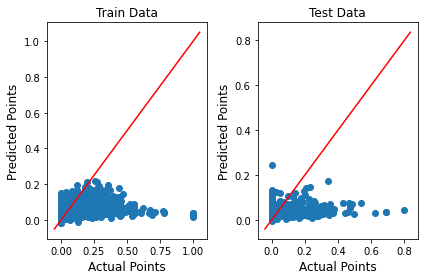

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.09670421850321809
RMSE for negative sentiment: 0.10971842105976826
MAE for negative sentiment: 0.06458172361788032


For Test data:
R Squared for negative sentiment: -0.03329062147760231
rmse for negative sentiment: 0.10676659251771745
MAE for negative sentiment: 0.06835175156122197


#####Target 2: neu score

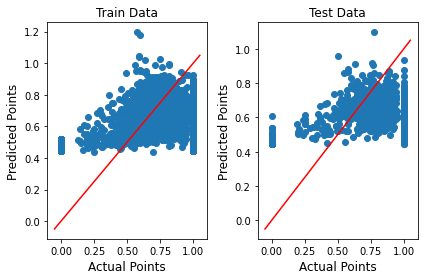

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.22647158546077473
RMSE for neutral sentiment: 0.26642692600689727
MAE for neutral sentiment: 0.22043863283489246


For Test data:
R Squared for neutral sentiment: 0.07025514265289678
RMSE for neutral sentiment: 0.2757524592098342
MAE for neutral sentiment: 0.22771774436352998


#####Target 3: pos score

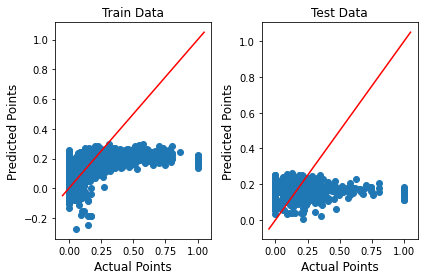

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.157544897981177
RMSE for positive sentiment: 0.19993502533345878
MAE for positive sentiment: 0.1363380370695343


For Test data:
R Squared for positive sentiment: -0.03347751604938676
RMSE for positive sentiment: 0.20869439490497518
MAE for positive sentiment: 0.1489645143264391


#####Target 4: comp score

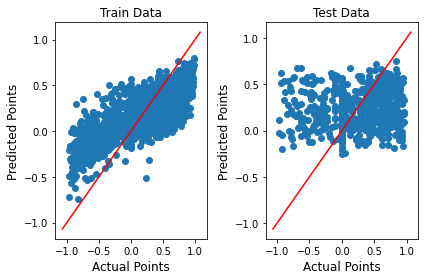

In [ ]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [ ]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.5622835772204162
RMSE for comp sentiment: 0.285668061135626
MAE for comp sentiment: 0.22267857352273235


For Test data:
R Squared for comp sentiment: -0.08891885077597617
RMSE for comp sentiment: 0.44702186064805893
MAE for comp sentiment: 0.3387524514914824


###Conclusion
* We have observed that for the Negative score, CountVectorizer() or TfidfVectorizer() are performing better that other models.
* We have observed that for the Neutral score, CountVectorizer() is performing better than other models.
* We have observed that for the Positive score, CountVectorizer() or TfidfVectorizer() are performing better that other models.
* We have observed that for the Compound score, CountVectorizer() is 
performing better than other models.
* We also observed that MAE for Positive and Negative Scores is less when compared to the MAE values for the Neutral and Compound scores.

##Part-3: Analysis

* RMSE

\begin{array}{|c|c|} \hline
Target & CountVectorizer() & TfidfVectorizer() & Word Embeddings & Advanced DL \\ \hline
negative & 0.102 & 0.09 & 0.116 & 0.114 \\ \hline
neutral & 0.22 & 0.224 & 0.265 & 0.224 \\\hline
positive & 0.136 & 0.116 & 0.238 & 0.203 \\ \hline
compound & 0.278 & 0.228 & 0.456 & 0.43 \\ \hline
\end{array}

* MAE

\begin{array}{|c|c|} \hline
Target & CountVectorizer() & TfidfVectorizer() & Word Embeddings & Advanced DL \\ \hline
negative & 0.053 & 0.05 & 0.075 & 0.069 \\ \hline
neutral & 0.138 & 0.163 & 0.201 & 0.192 \\\hline
positive & 0.073 & 0.079 & 0.149 & 0.146 \\ \hline
compound & 0.191 & 0.202 & 0.346 & 0.33 \\ \hline
\end{array}
 
* From the RMSE and MAE values for the test data we can see that CountVectorizer() and TfidfVectorizer() have almost same values. 
* And also CountVectorizer() and TfidfVectorizer() are best models out of the 4 models as they have less RMSE and MAE values with good R squared values.
* Also these models are predicting Negative Score and Positive score more accurately than Neutral and compound Scores.
* Changing the hyper parameters also helped slightly but not to our expectations.
* Coming to the architecture, we have seen some improvements as we changed it.
* As we increase the number of layers, the performance has increased but not so high.
* Adding dropouts after NN layers helped to increase the R squared but not as expected. Still it is overfitting, but it helped.
* Reducing the patience value, batch size and limiting the batch size also helped in the improvement.
* Since, the data is very small, adding SimpleRNN layers to the model architecture gave slight improvement.
* The primary problem here is that the data we have is very small. It is only 4k tweets. But, the model is sightly better when the data size is increased from 2k to 4k tweets.
* So, increasing the data largely would improve the model performance in capturing the sentiments. 
* We can say that Deep learning models are able to steal the logic of the nltk SentimentIntensityAnalyzer() for atleast positive and negative scores.
* Rule-based models blindly follows more advanced rules. Deep-learning models doesn’t blindly tag keywords or ‘rules’. It infers meaning based on patterns between words and the wider context of the sentence and paragraph they sit within. 
* Deep learning models require more data as compared to rule-based models. Rule-based models can operate with simple basic information and data. However, deep learning models require full demographic data details.
